In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [54]:
train_df = pd.read_csv('train.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')
val_df = pd.read_csv('valid.tsv', sep='\t')

In [55]:
combined_df = pd.concat([train_df, test_df, val_df], ignore_index=True)

### Data Exploration

In [56]:
combined_df

,id,label,statement,subjects,speaker,speaker_job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference
12787,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy
12788,401.json,TRUE,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0.0,1.0,0.0,2.0,0.0,a television ad
12789,1055.json,FALSE,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.


#### 12791 total statements

#### Class Distribution across Labels: 

In [57]:
label_counts = combined_df['label'].value_counts(dropna=False)
label_props = combined_df['label'].value_counts(normalize=True, dropna=False)
label_summary = pd.DataFrame({
    'count': label_counts,
    'proportion': label_props,
    'percent': (label_props * 100).round(2)
})
label_summary

,count,proportion,percent
label,,,
half-true,2627,0.205379,20.54
FALSE,2507,0.195997,19.60
mostly-true,2454,0.191854,19.19
barely-true,2103,0.164412,16.44
TRUE,2053,0.160503,16.05
pants-fire,1047,0.081854,8.19


#### Unique Speaker Count

In [58]:
combined_df['speaker'].nunique()

3309

#### Parties

In [59]:
party_counts = combined_df['party'].value_counts(dropna=False)
party_props = combined_df['party'].value_counts(normalize=True, dropna=False)
party_summary = pd.DataFrame({
    'count': party_counts,
    'proportion': party_props,
    'percent': (party_props * 100).round(2)
})
party_summary

,count,proportion,percent
party,,,
republican,5665,0.442890,44.29
democrat,4137,0.323431,32.34
none,2181,0.170511,17.05
organization,264,0.020640,2.06
independent,180,0.014072,1.41
newsmaker,64,0.005004,0.50
libertarian,51,0.003987,0.40
journalist,49,0.003831,0.38
activist,45,0.003518,0.35


#### Unique Contexts

In [60]:
combined_df['context'].nunique()

5142

### Truthfulness Distribution Analysis

In [61]:
label_props = combined_df['label'].value_counts(normalize=True, dropna=False)

trueish = label_props.get('TRUE', 0) + label_props.get('mostly-true', 0)
mixed = label_props.get('half-true', 0)
falseish = (
    label_props.get('barely-true', 0)
    + label_props.get('FALSE', 0)
    + label_props.get('pants-fire', 0)
)

pd.DataFrame({
    'group': ['True-ish', 'Mixed', 'False-ish'],
    'proportion': [trueish, mixed, falseish],
    'percent': [round(trueish * 100, 2), round(mixed * 100, 2), round(falseish * 100, 2)]
})

,group,proportion,percent
0,True-ish,0.352357,35.24
1,Mixed,0.205379,20.54
2,False-ish,0.442264,44.23


### Binary Mapping

In [62]:
binary_map = {
    'TRUE': 'true',
    'mostly-true': 'true',
    'half-true': 'true',      # treat mixed as true for binary
    'barely-true': 'false',
    'FALSE': 'false',
    'pants-fire': 'false'
}

binary_props = combined_df['label'].map(binary_map).value_counts(normalize=True, dropna=False)

binary_props

label
true     0.557736
false    0.442264
Name: proportion, dtype: float64

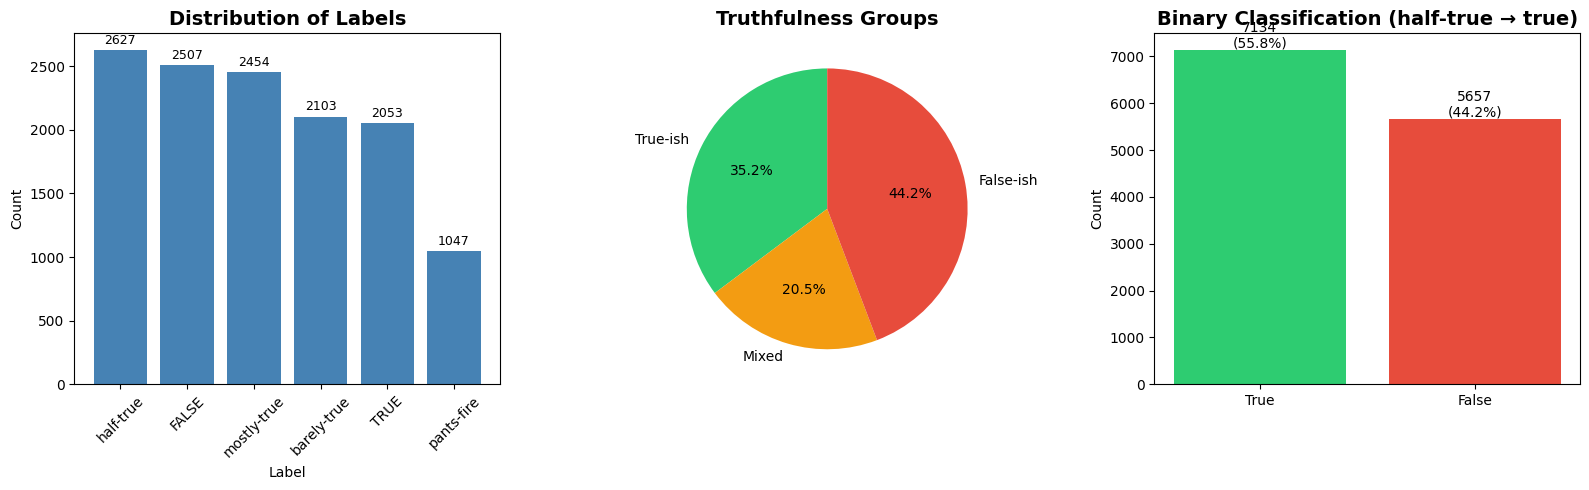

In [63]:
# Bar chart of labels
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Bar chart - label distribution
ax1 = axes[0]
label_summary_sorted = label_summary.sort_values('count', ascending=False)
ax1.bar(label_summary_sorted.index, label_summary_sorted['count'], color='steelblue')
ax1.set_title('Distribution of Labels', fontsize=14, fontweight='bold')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(label_summary_sorted['count']):
    ax1.text(i, v + 50, str(v), ha='center', fontsize=9)

# 2. Pie chart - truthfulness groups
ax2 = axes[1]
truthfulness_data = pd.DataFrame({
    'group': ['True-ish', 'Mixed', 'False-ish'],
    'proportion': [trueish, mixed, falseish]
})
colors = ['#2ecc71', '#f39c12', '#e74c3c']
ax2.pie(truthfulness_data['proportion'], labels=truthfulness_data['group'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Truthfulness Groups', fontsize=14, fontweight='bold')

# 3. Binary breakdown
ax3 = axes[2]
binary_counts = combined_df['label'].map(binary_map).value_counts()
ax3.bar(['True', 'False'], binary_counts.values, color=['#2ecc71', '#e74c3c'])
ax3.set_title('Binary Classification (half-true → true)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count')
for i, v in enumerate(binary_counts.values):
    ax3.text(i, v + 50, f"{v}\n({v/len(combined_df)*100:.1f}%)", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Policy Implications

**False-ish statements:** 44.3%  
(barely-true + FALSE + pants-fire)

**True-ish statements:** 35.2%  
(TRUE + mostly-true)

**Mixed statements:** 20.5%  
(half-true)

### Interpretation:
- **44.3% misleading** suggests significant misinformation problem
- **NOT a small minority** → systemic issue
- Broad censorship may be justified
- Nuanced approach needed for "mixed" category

### Party-Level Analysis

In [64]:
# Falsehood rate by party
party_label_counts = combined_df.groupby(['party', 'label']).size().unstack(fill_value=0)
party_totals = party_label_counts.sum(axis=1)

#false-ish rate per party
falseish_labels = ['barely-true', 'FALSE', 'pants-fire']
party_false_counts = party_label_counts[falseish_labels].sum(axis=1)
party_false_rate = (party_false_counts / party_totals * 100).sort_values(ascending=False)

party_false_rate

party
Moderate                        100.000000
constitution-party              100.000000
ocean-state-tea-party-action    100.000000
green                            66.666667
talk-show-host                   62.500000
organization                     51.515152
none                             50.527281
county-commissioner              50.000000
republican                       49.796999
columnist                        47.727273
labor-leader                     46.666667
journalist                       36.734694
newsmaker                        35.937500
activist                         35.555556
democrat                         33.937636
libertarian                      33.333333
independent                      30.000000
tea-party-member                 30.000000
business-leader                  27.272727
state-official                    8.333333
liberal-party-canada              0.000000
government-body                   0.000000
education-official                0.000000
democ

In [65]:
# Average truth score by party (assign numeric scores)
truth_scores = {
    'pants-fire': 0,
    'FALSE': 1,
    'barely-true': 2,
    'half-true': 3,
    'mostly-true': 4,
    'TRUE': 5
}

combined_df['truth_score'] = combined_df['label'].map(truth_scores)
avg_score_by_party = combined_df.groupby('party')['truth_score'].mean().sort_values()

avg_score_by_party

party
constitution-party              0.666667
Moderate                        1.000000
ocean-state-tea-party-action    2.000000
county-commissioner             2.000000
talk-show-host                  2.000000
green                           2.000000
organization                    2.431818
none                            2.435580
republican                      2.554634
tea-party-member                2.600000
labor-leader                    2.666667
columnist                       2.931818
activist                        2.955556
libertarian                     2.960784
journalist                      2.979592
democratic-farmer-labor         3.000000
democrat                        3.048828
newsmaker                       3.093750
independent                     3.222222
government-body                 3.500000
business-leader                 3.545455
state-official                  3.625000
education-official              4.000000
liberal-party-canada            4.000000
Name: trut

In [66]:
# Statistical significance test (ANOVA)
from scipy.stats import f_oneway

# Get top parties for cleaner comparison
top_parties = combined_df['party'].value_counts().head(5).index
party_groups = [combined_df[combined_df['party'] == p]['truth_score'].dropna() 
                for p in top_parties]

f_stat, p_value = f_oneway(*party_groups)

f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}, Significant: {p_value < 0.05}"

'F-statistic: 89.13, p-value: 0.0000, Significant: True'

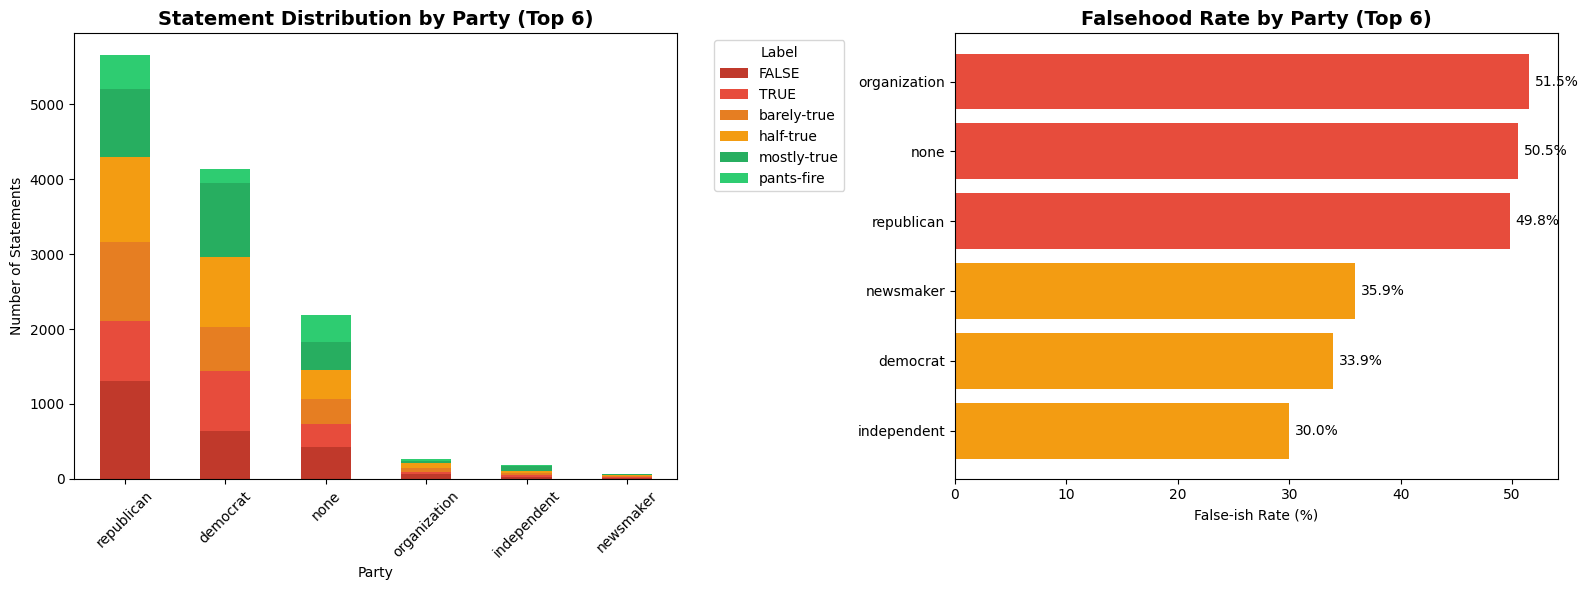

In [67]:
# Visuals: Stacked bars by party
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Stacked bar - top 6 parties
ax1 = axes[0]
top_6_parties = party_totals.nlargest(6).index
party_label_top = party_label_counts.loc[top_6_parties]

party_label_top.plot(kind='bar', stacked=True, ax=ax1, 
                     color=['#c0392b', '#e74c3c', '#e67e22', '#f39c12', '#27ae60', '#2ecc71'])
ax1.set_title('Statement Distribution by Party (Top 6)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Party')
ax1.set_ylabel('Number of Statements')
ax1.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 2. False rate comparison
ax2 = axes[1]
party_false_rate_top = party_false_rate[top_6_parties].sort_values()
bars = ax2.barh(range(len(party_false_rate_top)), party_false_rate_top.values, 
                color=['#e74c3c' if x > 40 else '#f39c12' for x in party_false_rate_top.values])
ax2.set_yticks(range(len(party_false_rate_top)))
ax2.set_yticklabels(party_false_rate_top.index)
ax2.set_xlabel('False-ish Rate (%)')
ax2.set_title('Falsehood Rate by Party (Top 6)', fontsize=14, fontweight='bold')
for i, v in enumerate(party_false_rate_top.values):
    ax2.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Political Party Analysis

### Key Findings:
- **Falsehood rates vary by party** (see visualization above)
- **Statistical significance**: [p-value from ANOVA test]
- **Volume matters**: Parties with more statements may appear more false simply due to sample size

### Critical Caveat:
 **Higher flag rate ≠ proof of dishonesty**

**Possible explanations:**
1. **Coverage bias**: Media/fact-checkers may disproportionately scrutinize certain parties
2. **Sampling bias**: Dataset reflects what was fact-checked, not universe of all statements
3. **Context matters**: Controversial figures get fact-checked more often
4. **Actual behavior differences**: Some difference may be real

### Policy Implications:
- Cannot use raw rates alone to justify targeted enforcement
- Need to control for:
  - Statement volume
  - Topic coverage
  - Speaker prominence
  - Temporal factors

- Risk of **partisan censorship claims** if context ignored
- Fairness requires understanding *why* rates differ, not just *that* they differ

### Context level analysis

In [68]:
# First, let's see what contexts we have
combined_df['context'].value_counts()

context
a news release                                                  309
an interview                                                    286
a press release                                                 282
a speech                                                        259
a TV ad                                                         222
                                                               ... 
a town hall meeting in Colebrook, N.H.                            1
in a press release calling for debates.                           1
an ad, “Janice,” released September 6, 2012                       1
an interview on Comedy Central's Daily Show with Jon Stewart      1
a speech on the economy                                           1
Name: count, Length: 5142, dtype: int64

In [71]:
context_groups = pd.read_csv('context_groups.csv')
combined_df = combined_df.merge(context_groups, on='context', how='left')

In [73]:
combined_df['context_group'] = combined_df['context_group'].fillna('Other')
combined_df['context_group'].value_counts()

context_group
Other                      2365
Interview                  2155
Campaign Ad                1547
Press Release/Statement    1508
Speech/Rally               1427
Debate                      921
TV/Radio                    883
News Article/Editorial      759
Social Media                719
Legislative/Official        564
Name: count, dtype: int64

In [74]:
# Falsehood rate by context group
combined_df_filtered = combined_df[combined_df['party'] != 'none'].copy()

context_label_counts = combined_df_filtered.groupby(['context_group', 'label']).size().unstack(fill_value=0)
context_totals = context_label_counts.sum(axis=1)

falseish_labels = ['barely-true', 'FALSE', 'pants-fire']
context_false_counts = context_label_counts[falseish_labels].sum(axis=1)
context_false_rate = (context_false_counts / context_totals * 100).sort_values(ascending=False)

context_summary = pd.DataFrame({
    'total_statements': context_totals,
    'false_count': context_false_counts,
    'false_rate_%': context_false_rate.round(2),
    'avg_truth_score': combined_df_filtered.groupby('context_group')['truth_score'].mean().round(2)
}).sort_values('false_rate_%', ascending=False)

context_summary

,total_statements,false_count,false_rate_%,avg_truth_score
context_group,,,,
Campaign Ad,1240,603,48.63,2.57
Interview,1967,896,45.55,2.67
Other,1743,779,44.69,2.69
Debate,911,399,43.80,2.75
Social Media,479,208,43.42,2.72
Press Release/Statement,1334,576,43.18,2.82
Legislative/Official,521,212,40.69,2.88
TV/Radio,522,210,40.23,2.84
News Article/Editorial,558,212,37.99,3.02


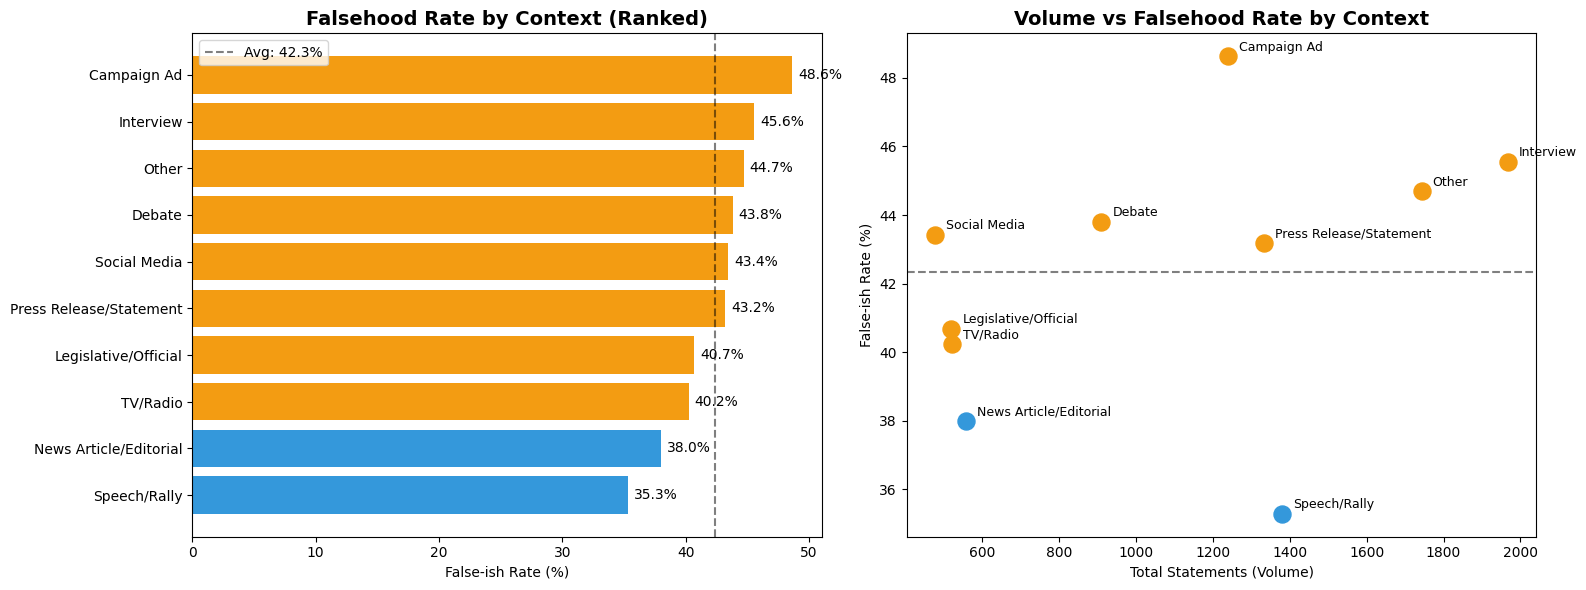

In [75]:
# Ranked bar chart: Falsehood rate by context group
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Ranked horizontal bar - false rate
ax1 = axes[0]
rate_sorted = context_false_rate.sort_values()
colors_bar = ['#e74c3c' if x > 50 else '#f39c12' if x > 40 else '#3498db' for x in rate_sorted.values]
bars = ax1.barh(range(len(rate_sorted)), rate_sorted.values, color=colors_bar)
ax1.set_yticks(range(len(rate_sorted)))
ax1.set_yticklabels(rate_sorted.index)
ax1.set_xlabel('False-ish Rate (%)')
ax1.set_title('Falsehood Rate by Context (Ranked)', fontsize=14, fontweight='bold')
ax1.axvline(x=context_false_rate.mean(), color='black', linestyle='--', alpha=0.5, label=f'Avg: {context_false_rate.mean():.1f}%')
ax1.legend()
for i, v in enumerate(rate_sorted.values):
    ax1.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

# 2. Volume vs false rate scatter
ax2 = axes[1]
for group in context_summary.index:
    row = context_summary.loc[group]
    color = '#e74c3c' if row['false_rate_%'] > 50 else '#f39c12' if row['false_rate_%'] > 40 else '#3498db'
    ax2.scatter(row['total_statements'], row['false_rate_%'], s=150, color=color, zorder=5)
    ax2.annotate(group, (row['total_statements'], row['false_rate_%']),
                 textcoords="offset points", xytext=(8, 4), fontsize=9)
ax2.set_xlabel('Total Statements (Volume)')
ax2.set_ylabel('False-ish Rate (%)')
ax2.set_title('Volume vs Falsehood Rate by Context', fontsize=14, fontweight='bold')
ax2.axhline(y=context_false_rate.mean(), color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Speaker Level Analysis

In [78]:
# Distribution of statements per speaker
speaker_counts = combined_df_filtered.groupby('speaker').size().sort_values(ascending=False)

print(f"Total speakers: {len(speaker_counts)}")
print(f"Top 10% of speakers account for {(speaker_counts.head(len(speaker_counts)//10).sum() / speaker_counts.sum())*100}% of statements")
print(f"\nStatements per speaker stats:")
print(speaker_counts.describe().round(2))

Total speakers: 2297
Top 10% of speakers account for 64.65784286116588% of statements

Statements per speaker stats:
count    2297.00
mean        4.64
std        19.84
min         1.00
25%         1.00
50%         1.00
75%         3.00
max       611.00
dtype: float64


In [81]:
combined_df['speaker'].value_counts()

speaker
barack-obama                611
donald-trump                343
hillary-clinton             297
mitt-romney                 214
john-mccain                 189
                           ... 
bob-latta                     1
thomas-lindsay                1
brad-rockwell                 1
tomorrows-vision-florida      1
sal-esquivel                  1
Name: count, Length: 3309, dtype: int64

In [79]:
# False rate per speaker (min 3 statements to be meaningful)
speaker_labels = combined_df_filtered.groupby(['speaker', 'label']).size().unstack(fill_value=0)
speaker_totals = speaker_labels.sum(axis=1)
speaker_false_counts = speaker_labels[falseish_labels].sum(axis=1)
speaker_false_rate = (speaker_false_counts / speaker_totals * 100)

# Filter to speakers with 3+ statements
min_statements = 3
qualified_speakers = speaker_totals[speaker_totals >= min_statements].index
speaker_false_rate_qualified = speaker_false_rate[qualified_speakers].sort_values(ascending=False)

# Top decile offenders
top_decile_cutoff = int(len(speaker_false_rate_qualified) * 0.1)
top_offenders = speaker_false_rate_qualified.head(top_decile_cutoff)

top_offender_summary = pd.DataFrame({
    'total_statements': speaker_totals[top_offenders.index],
    'false_count': speaker_false_counts[top_offenders.index],
    'false_rate_%': top_offenders.round(2)
}).sort_values('false_count', ascending=False).head(20)

top_offender_summary

,total_statements,false_count,false_rate_%
speaker,,,
michele-bachmann,61,46,75.41
democratic-congressional-campaign-committee,34,28,82.35
ben-carson,28,23,82.14
state-democratic-party-wisconsin,24,19,79.17
chris-larson,13,12,92.31
louie-gohmert,10,9,90.00
jim-demint,11,9,81.82
future-pac-oregon-house-democrats,7,7,100.00
richard-saslaw,7,7,100.00
